ARBOLES DE DECISION

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#cargamos los datos de entrada
from google.colab import drive


In [3]:
drive.mount('/content/drive')
data = pd.read_csv('drive/MyDrive/winequality-red.csv')
#veamos cuantas dimensiones y registros contiene
data.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

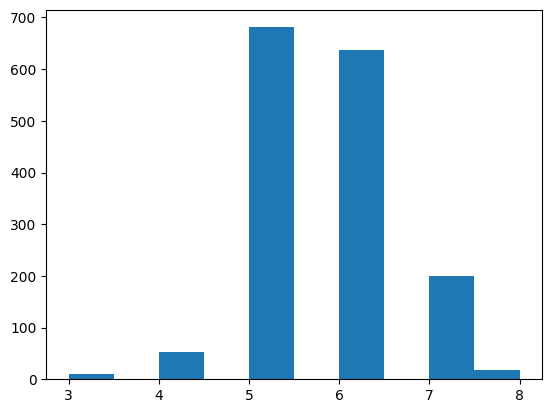

In [7]:
plt.hist(data.quality)

<Axes: xlabel='density', ylabel='alcohol'>

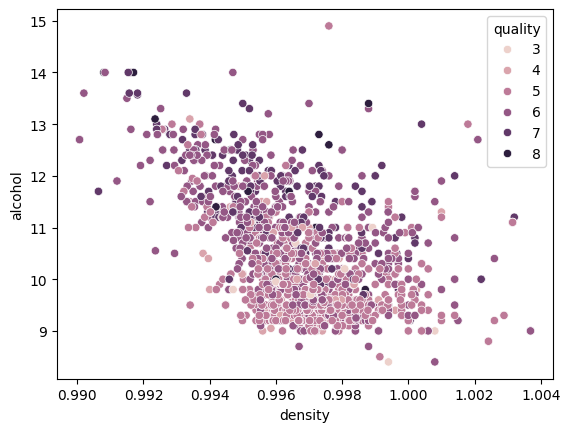

In [8]:
sns.scatterplot(x = "density", y = "alcohol", hue = "quality", data = data)

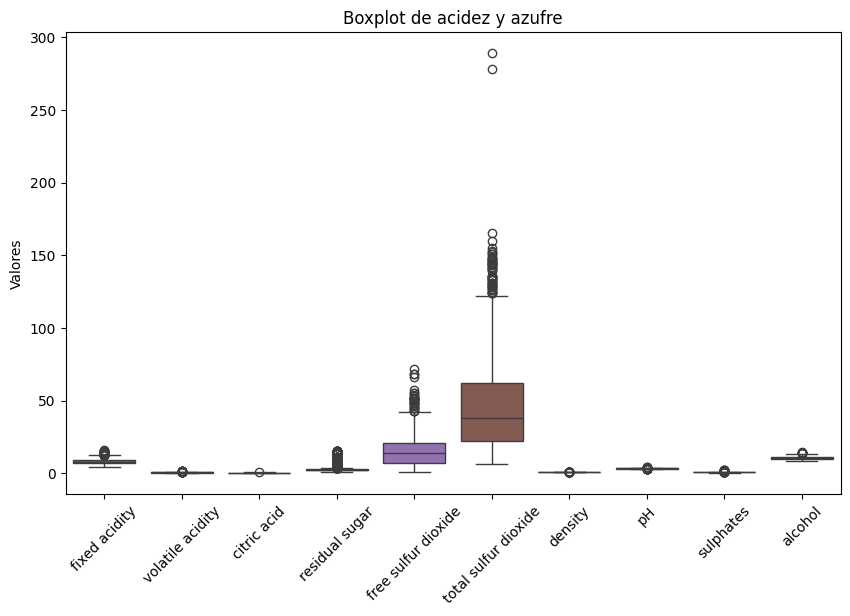

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','residual sugar', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot de acidez y azufre')
plt.ylabel('Valores')
plt.show()

In [11]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
target_col = ['quality']

In [12]:
predictors = data[predictors_col]
target = data[target_col]

In [13]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [15]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000


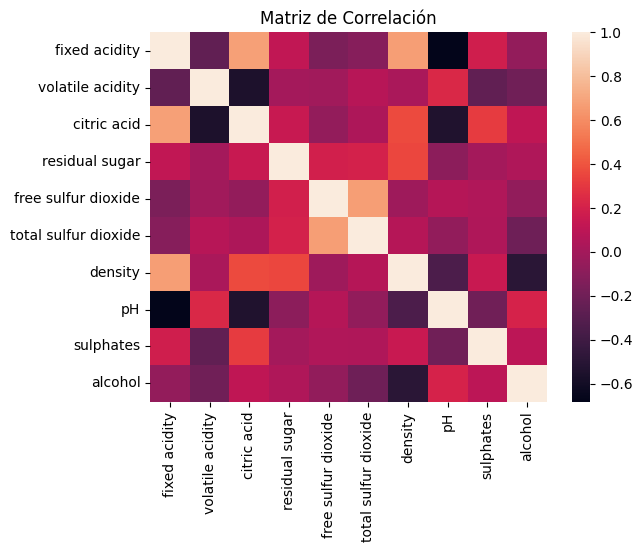

In [16]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=10)

In [18]:
tree = DecisionTreeClassifier()

In [19]:
arbol = tree.fit(X_train, y_train)

[Text(0.5939852428863769, 0.975, 'x[9] <= 10.525\ngini = 0.64\nsamples = 1279\nvalue = [8.0, 44.0, 549.0, 511.0, 157.0, 10.0]'),
 Text(0.38787517053206005, 0.925, 'x[5] <= 83.5\ngini = 0.544\nsamples = 798\nvalue = [6, 28, 466, 267, 30, 1]'),
 Text(0.4909302067092185, 0.95, 'True  '),
 Text(0.17840089651140129, 0.875, 'x[8] <= 0.525\ngini = 0.58\nsamples = 638\nvalue = [6.0, 26.0, 332.0, 243.0, 30.0, 1.0]'),
 Text(0.03625024361722861, 0.825, 'x[9] <= 9.075\ngini = 0.421\nsamples = 131\nvalue = [2, 13, 97, 19, 0, 0]'),
 Text(0.023777041512375755, 0.775, 'x[1] <= 0.455\ngini = 0.56\nsamples = 5\nvalue = [0, 3, 1, 1, 0, 0]'),
 Text(0.020658740986162542, 0.725, 'x[4] <= 13.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(0.017540440459949326, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.023777041512375755, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.026895342038588968, 0.725, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 

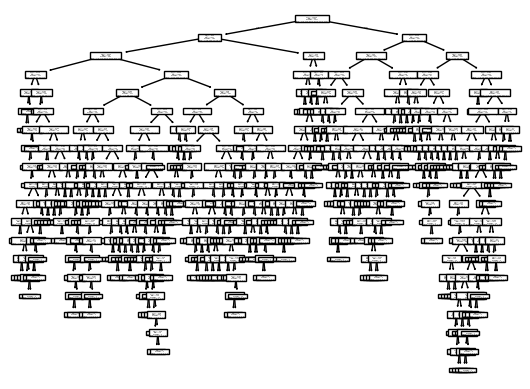

In [20]:
plot_tree(arbol)

In [21]:
predicciones = arbol.predict(X_test)

In [22]:
predicciones

array([6, 5, 6, 6, 6, 7, 7, 7, 3, 5, 7, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6,
       6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 7, 5, 5, 7, 5, 6, 5, 6, 6, 5, 6,
       5, 7, 6, 7, 7, 5, 6, 7, 6, 6, 6, 7, 5, 5, 5, 4, 6, 5, 7, 6, 6, 5,
       6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 5, 7, 5, 7, 7, 5, 8, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 7, 6, 5, 6, 5, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 5,
       5, 7, 7, 5, 6, 5, 4, 5, 6, 6, 5, 5, 6, 5, 5, 4, 5, 5, 5, 5, 6, 5,
       5, 4, 6, 6, 7, 5, 5, 7, 6, 6, 7, 7, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7,
       6, 5, 5, 3, 5, 7, 6, 6, 7, 5, 6, 4, 6, 7, 7, 5, 5, 5, 6, 6, 5, 5,
       6, 6, 5, 7, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 7, 7, 6, 6, 3, 5,
       7, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 6, 4, 5, 5, 6, 5, 5, 5, 5,
       5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 4, 7, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 7, 7, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 4, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5,
       8, 6, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 6, 6,

In [23]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,1,0,1,0,0
4,0,0,5,4,0,0
5,2,4,99,24,2,1
6,0,3,25,82,16,1
7,1,0,5,15,21,0
8,0,0,0,4,4,0


In [24]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.63125

In [25]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.619192838357408

In [26]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.63125

In [27]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.625160568220735